## 数据加载与EDA

In [1]:
import pandas as pd

#数据加载
df_train=pd.read_csv('./GiveMeSomeCredit/cs-training.csv')
df_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [2]:
#去掉第一列
df_train=df_train.drop(['Unnamed: 0'],axis=1)

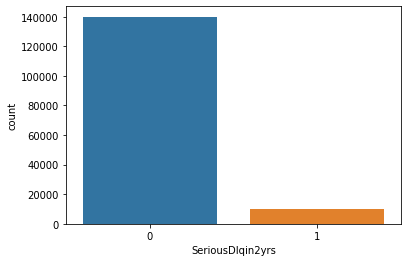

In [3]:
#违约率SeriousDlqin2yrs 进行可视化
import seaborn as sns
sns.countplot(x='SeriousDlqin2yrs', data=df_train)

In [4]:
#违约比例
df_train['SeriousDlqin2yrs'].sum()/len(df_train)

0.06684

In [5]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [7]:
df_train['RevolvingUtilizationOfUnsecuredLines'].value_counts()

0.000000    10878
1.000000    10256
1.000000       17
0.950100        8
0.713147        6
            ...  
0.486200        1
0.039377        1
0.030780        1
0.355181        1
0.168611        1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 125728, dtype: int64

/Users/muyu/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


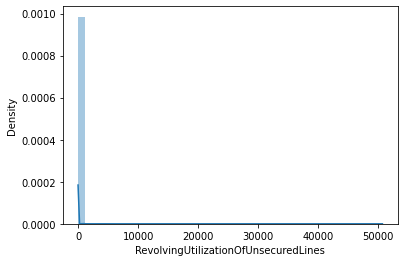

In [8]:
#直方图分布
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [9]:
df_train.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [10]:
df_train.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [11]:
#使用中位数进行缺失值填充
df_train=df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [12]:
##数据分箱
#将age字段分成6段
import math
age_bins=[-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age']=pd.cut(df_train['age'], bins=age_bins)

#将NumberOfDependents（家属人数）字段，分成6段
dependent_bins=[-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents']=pd.cut(df_train['NumberOfDependents'], bins=dependent_bins)

#对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
dpd_bins=[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse']=pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse']=pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate']=pd.cut(df_train['NumberOfTimes90DaysLate'], bins=dpd_bins)

#对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
df_train['bin_RevolvingUtilizationOfUnsecuredLines']=pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'], q=5, duplicates='drop')
df_train['bin_DebtRatio']=pd.qcut(df_train['DebtRatio'], q=5, duplicates='drop')
df_train['bin_MonthlyIncome']=pd.qcut(df_train['MonthlyIncome'], q=5, duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans']=pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'], q=5, duplicates='drop')
#df_train['bin_NumberRealEstateLoansOrLines']=pd.qcut(df_train['NumberRealEstateLoansOrLines'], q=5, duplicates='drop')
loans_bins=[-math.inf,0,1,2,3,math.inf]
df_train['bin_NumberRealEstateLoansOrLines']=pd.cut(df_train['NumberRealEstateLoansOrLines'], bins=loans_bins) #这个字段等频分桶数据分布有点问题，所以等距分桶

In [13]:
#统计分箱字段
bin_cols=[c for c in df_train.columns.values if c.startswith('bin_')]

In [14]:
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [15]:
import numpy as np

def cal_WOE(df, features, target):
    df_new=df.copy()
    for f in features:
        df_woe=df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns=list(map(''.join, df_woe.columns.values))
        df_woe=df_woe.reset_index()
        df_woe=df_woe.rename(columns={target+'sum':'bad', target+'count':'all'})
        df_woe['good']=df_woe['all']-df_woe['bad']
        df_woe['margin bad']=df_woe['bad']/df_woe['bad'].sum()
        df_woe['margin good']=df_woe['good']/df_woe['good'].sum()
        #margin good如果为0，woe会为正无穷，导致后面切分数据集时inf报错，此时使用np.log1p能够防止分母为0的情况
        df_woe['woe']=np.log1p(df_woe['margin bad']/df_woe['margin good'])
        df_woe.columns=[c if c==f else c+'_'+f for c in list(df_woe.columns.values)] #重命名为特征_计算出的字段，防止不同特征计算出的字段重名
        df_new=df_new.merge(df_woe, on=f, how='left')
    return df_new

#计算IV，衡量变量的预测能力
def cal_IV(df, feature, target):
    lst=[]
    cols=['Variable','Value','All','Bad']
    #对feature字段中的每个分箱进行遍历
    for i in range(df[feature].nunique()): #.nunique()代表不同值的个数
        #得到feature字段的第i个分箱取值val
        val=list(df[feature].unique())[i]
        #统计feature, feature_value，这个value的个数，这个value导致target=1的个数
        lst.append([feature, val, df[df[feature]==val].count()[feature], df[(df[feature]==val) & (df[target]==1)].count()[feature]])
    #print(lst)
    data=pd.DataFrame(lst, columns=cols)
    data=data[data['Bad']>0]
    data['Share']=data['All']/data['All'].sum() #这个value所占比例
    data['Bad Rate']=data['Bad']/data['All'] #这个value导致bad的情况占该value个数的比例
    data['Margin Bad']=data['Bad']/data['Bad'].sum() #Margin Bad
    data['Margin Good']=(data['All']-data['Bad'])/(data['All'].sum()-data['Bad'].sum()) #Margin Good
    data['woe']=np.log(data['Margin Bad']/data['Margin Good'])
    data['iv']=(data['woe'] * (data['Margin Bad']-data['Margin Good'])).sum()
    data=data.sort_values(by=['Variable', 'Value'])
    return data['iv'].values[0]

In [16]:
#计算每个字段的iv值
feature_cols=[]
for f in bin_cols:
    iv=cal_IV(df_train, f, 'SeriousDlqin2yrs')
    if iv>0.1:
        feature_cols.append(f)

In [17]:
feature_cols

['bin_age',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines']

In [18]:
#计算这些特征的woe
df_woe=cal_WOE(df_train, bin_cols, 'SeriousDlqin2yrs')

In [19]:
#得到WOE规则 feature, bin, woe
df_bin_to_woe=pd.DataFrame(columns=['features','bin','woe'])
for f in feature_cols:
    b=f
    w='woe_'+f
    df=df_woe[[w, b]].drop_duplicates()
    df.columns=['woe','bin']
    df['features']=f
    df_bin_to_woe=pd.concat([df_bin_to_woe, df])

In [20]:
df_bin_to_woe=df_bin_to_woe.sort_values(by=['features', 'bin']).reset_index().drop('index',axis=1)

In [21]:
df_bin_to_woe

,features,bin,woe
0,bin_NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
1,bin_NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
2,bin_NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
3,bin_NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111
4,bin_NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.520613
5,bin_NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",2.812612
6,bin_NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",2.774776
7,bin_NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",2.024184
8,bin_NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",2.077007
9,bin_NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",2.902860


In [22]:
##逻辑回归建模
#woe_cols=[c for c in list(df_woe.columns.values) if 'woe' in c]
woe_cols=['woe_'+c for c in feature_cols]

#数据集切分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=33)

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=33).fit(x_train, y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_pred, y_test)) #违约比例为6%
print(roc_auc_score(y_pred, y_test)) #如果要上线，AUC >= 0.8

0.9364333333333333
0.7787691092695656


In [23]:
model.coef_[0]

array([1.10219085, 0.87540308, 0.45306013, 0.72714541, 1.4410486 ])

In [24]:
#PDO=50, B=72.13
#odds=1的时候，P0的分数为650 => A=650
A, B=650, 72.13
#生成评分卡模型
def generate_scorecard(model_coef, binning_df, features, B):
    lst=[]
    cols=['Variable','Binning','Score']
    #模型系数
    coef=model_coef[0]
    #print(coef)
    for i in range(len(features)):
        f=features[i]
        #print(f)
        #得到这个feature的WOE规则
        df=binning_df[binning_df['features']==f]
        #print(df)
        for index, row in df.iterrows():
            score=int(round(-coef[i]*row['woe']*B)) #四舍五入后取整
            lst.append([f, row['bin'], score])
    data=pd.DataFrame(lst, columns=cols)
    return data

score_card=generate_scorecard(model.coef_, df_bin_to_woe, feature_cols, B)

In [25]:
score_card

,Variable,Binning,Score
0,bin_age,"(-inf, 25.0]",-81
1,bin_age,"(25.0, 40.0]",-76
2,bin_age,"(40.0, 50.0]",-65
3,bin_age,"(50.0, 60.0]",-52
4,bin_age,"(60.0, 70.0]",-32
5,bin_age,"(70.0, inf]",-22
6,bin_NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-36
7,bin_NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-114
8,bin_NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-136
9,bin_NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-153


In [26]:
#对每个字段按照分数降序排序
sort_scorecard=score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))
sort_scorecard

Variable  \
Variable                                                                                
bin_NumberOfTime30-59DaysPastDueNotWorse 6   bin_NumberOfTime30-59DaysPastDueNotWorse   
                                         7   bin_NumberOfTime30-59DaysPastDueNotWorse   
                                         13  bin_NumberOfTime30-59DaysPastDueNotWorse   
                                         14  bin_NumberOfTime30-59DaysPastDueNotWorse   
                                         8   bin_NumberOfTime30-59DaysPastDueNotWorse   
                                         9   bin_NumberOfTime30-59DaysPastDueNotWorse   
                                         10  bin_NumberOfTime30-59DaysPastDueNotWorse   
                                         12  bin_NumberOfTime30-59DaysPastDueNotWorse   
                                         11  bin_NumberOfTime30-59DaysPastDueNotWorse   
                                         15  bin_NumberOfTime30-59DaysPastDueNotWorse   
bin_NumberOfTime60-89DaysPastDueNotWorse 24  bin_NumberOfTime60-89DaysPastDueNotWorse   
                                         16  bin_NumberOfTime60-89DaysPastDueNotWorse   
                                         23  bin_NumberOfTime60-89DaysPastDueNotWorse   
                                         17  bin_NumberOfTime60-89DaysPastDueNotWorse   
                                         25  bin_NumberOfTime60-89DaysPastDueNotWorse   
                                         22  bin_NumberOfTime60-89DaysPastDueNotWorse   
                                         18  bin_NumberOfTime60-89DaysPastDueNotWorse   
                                         19  bin_NumberOfTime60-89DaysPastDueNotWorse   
                                         20  bin_NumberOfTime60-89DaysPastDueNotWorse   
                                         21  bin_NumberOfTime60-89DaysPastDueNotWorse   
bin_NumberOfTimes90DaysLate              26               bin_NumberOfTimes90DaysLate   
                                         27               bin_NumberOfTimes90DaysLate   
                                         35               bin_NumberOfTimes90DaysLate   
                                         28               bin_NumberOfTimes90DaysLate   
                                         31               bin_NumberOfTimes90DaysLate   
                                         30               bin_NumberOfTimes90DaysLate   
                                         29               bin_NumberOfTimes90DaysLate   
                                         33               bin_NumberOfTimes90DaysLate   
                                         34               bin_NumberOfTimes90DaysLate   
                                         32               bin_NumberOfTimes90DaysLate   
bin_RevolvingUtilizationOfUnsecuredLines 37  bin_RevolvingUtilizationOfUnsecuredLines   
                                         36  bin_RevolvingUtilizationOfUnsecuredLines   
                                         38  bin_RevolvingUtilizationOfUnsecuredLines   
                                         39  bin_RevolvingUtilizationOfUnsecuredLines   
                                         40  bin_RevolvingUtilizationOfUnsecuredLines   
bin_age                                  5                                    bin_age   
                                         4                                    bin_age   
                                         3                                    bin_age   
                                         2                                    bin_age   
                                         1                                    bin_age   
                                         0                                    bin_age   

                                                      Binning  Score  
Variable                                                              
bin_NumberOfTime30-59DaysPastDueNotWorse 6        (-inf, 1.0]    -36  
                                    